<a href="https://colab.research.google.com/github/mromaoro/mba_fiap/blob/main/reforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Reforcement Learning
##Contexto:
Imagine que você está trabalhando em uma empresa de logística que opera uma frota de robôs de entrega autônomos. Sua tarefa é implementar um algoritmo de aprendizado por reforço para otimizar a entrega de pacotes em um ambiente simulado. Os robôs têm a capacidade de se mover em um ambiente em grade 2D e devem aprender a tomar decisões sobre para onde se mover para entregar pacotes de forma eficiente.
##Objetivo:
O objetivo do desafio é implementar um agente de aprendizado por reforço usando ténicas como por exemplo Q-Table, equação de Bellman, ε-greedy e etc, para maximizar o retorno cumulativo ao entregar pacotes no menor tempo possível, considerando um "living penalty" para incentivar o agente a ser eficiente.
##Tarefas:
  * Modelagem do ambiente: Crie um ambiente 2D simulado, onde o agente pode se mover em um grid. Considere que o ambiente tem obstáculos e pontos de entrega de pacotes.

* Definição do MDP: Modele o problema como um MDP, definindo os estados, as ações, as recompensas, a função de transição e o fator de desconto.
* Implementação da Q-Table: Crie uma Q-Table para representar o valor estimado de cada par (estado, ação).

* Implementação do agente: Desenvolva um agente de aprendizado por reforço que utiliza a equação de Bellman para atualizar a Q-Table com base nas recompensas recebidas ao longo do tempo.
* Living Penalty: Introduza um "living penalty" para penalizar o agente por gastar muito tempo no ambiente. Isso deve incentivar o agente a encontrar a rota mais eficiente para entregar os pacotes.
* Treinamento e avaliação: Treine o agente usando um algoritmo de aprendizado por reforço, como o Q-Learning, e avalie seu desempenho em termos de eficiência na entrega de pacotes.


#Iniciando meu projeto

1. Definir o Ambiente
* Função __init__:
>Inicializa o ambiente, define o espaço de estados, o espaço de ações, e quaisquer parâmetros relevantes do ambiente.


* Função reset:
>Reinicia o ambiente para um estado inicial e retorna esse estado. É útil no início de cada episódio.

* Função step:
> Executa uma ação dentro do ambiente, retorna o novo estado, a recompensa obtida, e um sinalizador indicando se o episódio terminou (por exemplo, done).

* Função render (opcional):
> Fornece uma representação visual do estado do ambiente. Útil para depuração e compreensão do comportamento do agente.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


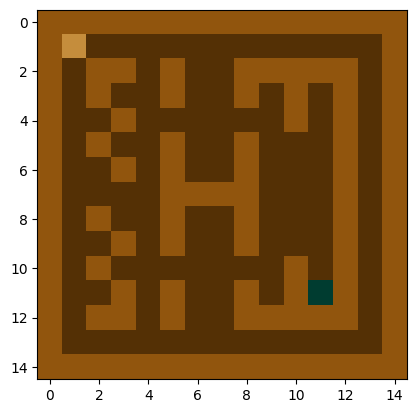

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


def env(start,goal):
  env_array = np.array([
      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
      [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
      [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
      [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
      [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],

  ])
  env_array[start[0], start[1]] = 2
  env_array[goal[0], goal[1]] = 9
  return env_array

env_viz = env([1,1],[11,11])

plt.figure()
plt.imshow(env_viz, cmap='BrBG', interpolation='none')
plt.show()

ob = [
  [2,2],[3,2],[5,2],[8,2],[10,2],[12,2],
  [2,3],[4,3],[6,3],[9,3],[11,3],[12,3],
  [2,5],[3,5],[5,5],[6,5],[7,5],[8,5],[9,5],[11,5],[12,5],
  [7,6],[7,7],
  [2,8],[3,8],[5,8],[6,8],[7,8],[8,8],[9,8],[11,8],[12,8],
  [2,9],[12,9],
  [2,10],[3,10],[4,10],[10,10],[11,10],[12,10],
  [2,11],[12,11],
  [2,12],[3,12],[4,12],[5,12],[6,12],[7,12],[8,12],[9,12],[10,12],[11,12],[12,12],
  [0,0],[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0],[10,0],[11,0],[12,0],[13,0],[14,0],
  [0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],[0,11],[0,12],[0,13],[0,14],
  [14,0],[14,1],[14,2],[14,3],[14,4],[14,5],[14,6],[14,7],[14,8],[14,9],[14,10],[14,11],[14,12],[14,13],[14,14],
  [0,14],[1,14],[2,14],[3,14],[4,14],[5,14],[6,14],[7,14],[8,14],[9,14],[10,14],[11,14],[12,14],[13,14],[14,14]
]

In [2]:
import gym
from gym import spaces
import numpy as np
import random
import os


class GridWorldEnv(gym.Env):
    """
    Ambiente personalizado de grid 15x15 para Reinforcement Learning.
    """
    def __init__(self):
        super(GridWorldEnv, self).__init__()
        self.grid_size = 15
        self.action_space = spaces.Discrete(4)  # 0: para cima, 1: para baixo, 2: esquerda, 3: direita
        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)

        # Definir o estado inicial e o objetivo
        self.agent_pos = [1, 1]
        self.goal_pos = [11, 11]

        # Criar obstáculos
        self.obstacles = ob

        # Certificar de que o objetivo e a posição inicial não são obstáculos
        self.obstacles = [obs for obs in self.obstacles if obs not in [self.agent_pos, self.goal_pos]]

    def reset(self):
        # Resetar a posição do agente para o início
        self.agent_pos = [1, 1]
        return self._get_obs()

    def _get_obs(self):
        # Obter a observação (estado) atual
        obs = np.zeros((self.grid_size, self.grid_size))
        obs[tuple(self.agent_pos)] = 1
        obs[tuple(self.goal_pos)] = 2
        for obs_pos in self.obstacles:
            obs[tuple(obs_pos)] = -1
        return obs.flatten()

    def step(self, action):

        prev_distance = abs(self.agent_pos[0] - self.goal_pos[0]) + abs(self.agent_pos[1] - self.goal_pos[1])

        # Atualizar a posição do agente com base na ação
        if action == 0 and self.agent_pos[0] > 0:  # Para cima
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.grid_size - 1:  # Para baixo
            self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0:  # Esquerda
            self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.grid_size - 1:  # Direita
            self.agent_pos[1] += 1

        new_distance = abs(self.agent_pos[0] - self.goal_pos[0]) + abs(self.agent_pos[1] - self.goal_pos[1])


        # Verificar se chegou ao objetivo
        done = self.agent_pos == self.goal_pos

        # Calcular a recompensa
        if done:
            reward = 10  # Recompensa grande por atingir o objetivo
        elif self.agent_pos in self.obstacles:
            reward = -10  # Penalidade grande por atingir um obstáculo
            self.reset()
        else:
            # Recompensa/penalidade baseada na mudança de distância para o objetivo
            if new_distance < prev_distance:
                reward = 1  # Recompensa por se aproximar do objetivo
            else:
                reward = -2  # Penalidade por se afastar do objetivo ou ficar parado


        # return self._get_obs(), reward, done, {}
        return self.agent_pos, reward, done, {}

    def render(self, mode='human'):
        # Configurar o tamanho da figura
        plt.figure(figsize=(5, 5))
        # Desenhar o grid
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                # Desenhar o agente
                if [i, j] == self.agent_pos:
                    plt.text(j, i, 'A', ha='center', va='center', color='blue', fontsize=18)
                # Desenhar o objetivo
                elif [i, j] == self.goal_pos:
                    plt.text(j, i, 'G', ha='center', va='center', color='green', fontsize=18)
                # Desenhar os obstáculos
                elif [i, j] in self.obstacles:
                    plt.fill_between([j-0.5, j+0.5], [i-0.5], [i+0.5], color='black')

        # Definir os limites e ocultar os eixos
        plt.xlim(-0.5, self.grid_size - 0.5)
        plt.ylim(-0.5, self.grid_size - 0.5)
        plt.xticks([])
        plt.yticks([])

        # Desenhar as linhas do grid
        for i in range(self.grid_size + 1):
            plt.plot([-0.5, self.grid_size - 0.5], [i - 0.5, i - 0.5], color='gray')
            plt.plot([i - 0.5, i - 0.5], [-0.5, self.grid_size - 0.5], color='gray')

        plt.show()

In [3]:
class Agent:
  def __init__(self, action_space, state_space, learning_rate, discount_factor, epsilon):
    self.action_space = action_space
    self.state_space = state_space
    self.learning_rate = learning_rate
    self.discount_factor = discount_factor
    self.epsilon = epsilon
    self.q_table = np.zeros((int(state_space * state_space), int(action_space.n))) # criação da Q-table
    self.grid_size = grid_size

  def choose_action(self, observation, test_mode=False):
    observation_unidim = observation[0] * self.grid_size + observation[1]
    if test_mode:
      return np.argmax(self.q_table[observation_unidim])  # A função np.argmax do NumPy encontra o índice da maior entrada em um array.
    else:
      if np.random.random() < self.epsilon:  # Exploração
          return np.random.choice(self.action_space.n)
      else:  # Exploração
          return np.argmax(self.q_table[observation_unidim])  # A função np.argmax do NumPy encontra o índice da maior entrada em um array. Quando aplicada à linha selecionada da tabela Q, ela retorna a ação com o maior Q-valor, ou seja, a ação que, de acordo com o conhecimento atual do agente, leva ao melhor resultado esperado a longo prazo.

  def update_epsilon(self, min_epsilon, decay_rate):
    if self.epsilon > min_epsilon:
        self.epsilon *= decay_rate

  def learn(self, state, action, reward, next_state, done):
    # state_unidim = state[0] * self.grid_size + state[1]
    # next_state_unidim = next_state[0] * self.grid_size + next_state[1]
    old_value = self.q_table[state, action]
    next_max = np.max(self.q_table[next_state])

    # Fórmula de atualização Q-learning
    new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
    self.q_table[state,action] = new_value

  def save_q_table(self, filename):
      np.save(filename, self.q_table)

  def load_q_table(self, filename):
      if os.path.exists(filename):
          self.q_table = np.load(filename)
      else:
          print("Q-Table file not found, starting with a new Q-Table.")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##3. Loop Principal de Treinamento
Loop de Episódios:

* Executar múltiplos episódios, onde em cada episódio o agente interage com o ambiente.
Dentro de Cada Episódio:

* Resetar o ambiente.

* Executar ações até o episódio terminar (sinalizado pelo ambiente).

* Em cada passo, usar a função step do ambiente e a função learn do agente.

In [ ]:
%%time

# Instanciar o ambiente
env = GridWorldEnv()

# Parâmetros para o agente
learning_rate = 0.5
discount_factor = 0.9
epsilon = 0.1  # Probabilidade de explorar
grid_size = 15  # Tamanho do grid do ambiente GridWorldEnv

# Instanciar o agente
agent = Agent(
    action_space= env.action_space,
    learning_rate= learning_rate,
    discount_factor= discount_factor,
    epsilon= epsilon,
    state_space= grid_size
)

num_episodes = 1 # Número total de episódios para treinamento
min_epsilon = 0.01  # Valor mínimo para epsilon
decay_rate = 0.99   # Taxa de decaimento de epsilon em 1% a cada episódio
total_rewards = []



for episode in range(num_episodes):
    state = env.agent_pos  # Inicializa o estado do ambiente
    done = False
    total_reward = 0
    total_states = []
    save_path = '/content/drive/MyDrive/Fiap individual/FIAP - material/Reforcement learning/rl_projeto_integrador/q_table.npy'
    agent.load_q_table(save_path)

    while not done:

        # # Converter o estado para um índice unidimensional
        state_index = state[0] * grid_size + state[1]

        action = agent.choose_action(state, test_mode=True)  # Agente escolhe uma ação
        next_state, reward, done, info = env.step(action)  # Ambiente responde com novo estado e recompensa

        # Converter o estado para um índice unidimensional
        next_state_index = next_state[0] * int(grid_size) + next_state[1]

        agent.learn(state_index, action, reward, next_state_index, done)  # Agente aprende com a experiência
        state = next_state  # Atualiza o estado atual para o próximo loop
        total_reward += reward

        total_states.append(state)
        total_rewards.append(total_reward)

        qtd_movimentos = len(total_states)

        # if episode % 100 == 0:
        print(f'Episode: {episode}, Total Reward: {total_reward}, state: {state}, action: {action}, next_state: {next_state}, done: {done}, info: {info}')
        env.render()

    agent.update_epsilon(min_epsilon, decay_rate)  # Atualiza epsilon

    print(f'Episode: {episode}, Total Reward: {total_reward}, Total Movimentos: {qtd_movimentos}, done: {done}')

    # Salvar a Q-Table após cada episódio
    agent.save_q_table(save_path)

    #   # Plotar as recompensas totais por episódio
    # plt.plot(total_rewards)
    # plt.title("Recompensa Total por Episódio")
    # plt.xlabel("Episódio")
    # plt.ylabel("Recompensa Total")
    # plt.show()


In [ ]:
# Supondo que o resto da configuração do ambiente e do agente permaneça o mesmo...

num_test_episodes = 10  # Número total de episódios para teste
total_rewards = []

for episode in range(num_test_episodes):
    state = env.reset()  # Reinicia o ambiente para o estado inicial
    done = False
    total_reward = 0

    # Carrega a Q-Table uma vez no início do episódio
    agent.load_q_table('q_table.npy')

    while not done:

        print(state)

        # Escolhe a ação no modo de teste
        action = agent.choose_action(state, test_mode=True)
        next_state, reward, done, info = env.step(action)

        state = next_state
        total_reward += reward

    total_rewards.append(total_reward)
    print(f'Episode: {episode}, Total Reward: {total_reward}')
    env.render()

# Aqui você pode adicionar código para plotar ou analisar as recompensas totais


[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0. -1. -1.  0. -1.
  0.  0. -1. -1. -1. -1. -1.  0. -1. -1.  0. -1.  0.  0. -1.  0.  0. -1.
  0. -1.  0. -1.  0. -1. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.
 -1.  0. -1. -1.  0. -1.  0.  0. -1.  0.  0. -1.  0.  0.  0. -1.  0. -1.
 -1.  0.  0. -1.  0. -1.  0.  0. -1.  0.  0.  0. -1.  0. -1. -1.  0.  0.
  0.  0. -1. -1. -1. -1.  0.  0.  0. -1.  0. -1. -1.  0. -1.  0.  0. -1.
  0.  0. -1.  0.  0.  0. -1.  0. -1. -1.  0.  0. -1.  0. -1.  0.  0. -1.
  0.  0.  0. -1.  0. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.
 -1.  0. -1. -1.  0.  0. -1.  0. -1.  0.  0. -1.  0. -1.  2. -1.  0. -1.
 -1.  0. -1. -1.  0. -1.  0.  0. -1. -1. -1. -1. -1.  0. -1. -1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.]


IndexError: ignored

In [ ]:
episode = 1
teste = np.load(f'q_table.npy')
teste

array([[ 0.        ,  0.        ,  0.        , -4.67375   ],
       [-4.67375   ,  0.725     , -5.        , -8.4125    ],
       [-9.4081543 ,  1.2125    , -8.260625  , -7.5       ],
       [ 0.        ,  0.75      , -5.        ,  0.        ],
       [-5.        ,  0.725     , -4.775     ,  0.        ],
       [ 0.        ,  0.5       , -4.67375   ,  0.        ],
       [ 0.        ,  0.        , -4.775     , -5.        ],
       [-8.4125    ,  0.5       , -5.        , -5.        ],
       [-5.        ,  0.        , -4.775     ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-5.        ,  0.5       ,  0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-5.        , -5.        ,  0.        , -5.        ],
       [ 0.        ,  0.        ,  0.        ,  1.25625   ],
       [-4.67375   ,  0.

In [ ]:
agent.q_table

In [ ]:
  def learn(self, state, action, reward, next_state, done):
    # state_unidim = state[0] * self.grid_size + state[1]
    # next_state_unidim = next_state[0] * self.grid_size + next_state[1]
    old_value = self.q_table[state, action]
    next_max = np.max(self.q_table[next_state])

    # Fórmula de atualização Q-learning
    new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
    self.q_table[next_state,action] = new_value

In [ ]:
agent.q_table

In [ ]:
next_state_index = next_state[0] * int(grid_size) + next_state[1]
next_state_index

In [ ]:

agent.learn(15,2,-1,16,0)

2. Definir o Agente de RL
* Função __init__:
> Inicializa o agente, define a política inicial (pode ser aleatória), parâmetros de aprendizado, e qualquer estrutura de dados necessária (como tabelas Q ou modelos de rede neural).

* Funções para Política de Ação:
> Funções para decidir ações, como choose_action, baseadas na política atual.

* Função de Aprendizado:
>learn ou update_policy para ajustar a política com base nas experiências (atualizando a tabela Q, parâmetros da rede neural, etc.).


4. Avaliação e Ajustes
Avaliar o Desempenho:

Periodicamente testar a política do agente em uma configuração sem aprendizado para avaliar o desempenho.
Ajustes de Hiperparâmetros:

Ajustar hiperparâmetros do agente com base no desempenho.
5. Salvar e Carregar Modelos (Opcional)
Funções para Salvar e Carregar:
Funções para salvar o estado do agente (como uma tabela Q ou pesos de rede neural) e carregar para futuras execuções ou análises.
Ordem Recomendada para a Criação:
Ambiente: Defina primeiro o ambiente, pois ele dita as regras, os estados e as ações disponíveis.
Agente: Com o ambiente definido, você pode construir o agente que interagirá com este ambiente.
Loop de Treinamento: Após ter o ambiente e o agente, crie o loop principal que controla o processo de treinamento.
Avaliação e Ajustes: Implemente a avaliação do desempenho e ajuste conforme necessário.
Funções de Salvamento: Por fim, adicione a capacidade de salvar e carregar o estado do agente.
Lembre-se, cada projeto de RL pode ter suas especificidades, então essa estrutura pode precisar ser adaptada de acordo com as necessidades do seu projeto específico.]